In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.model_selection import train_test_split

import copy
import missingno as msno
import datetime as dt
from dateutil.parser import parse

from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
path = './데이터/Sales_final.csv'
df_sales = pd.read_csv(path, encoding='utf-8', index_col = 0)

path = './데이터/Member_final.csv'
df_members = pd.read_csv(path, encoding='utf-8')

path = './데이터/Product_final.csv'
df_products = pd.read_csv(path, encoding='utf-8', index_col = 0)

path = './RFM/rfm_table_334.csv'
RFM = pd.read_csv(path, encoding='utf-8', index_col = 0)

C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
#df_members.dtypes

In [4]:
df_members = df_members.astype({'고객번호':'str'})
RFM = RFM.astype({'고객번호':'str'})

In [5]:
df = pd.merge(df_members, RFM[['고객번호', 'grade']], on='고객번호', how='left')
df['grade'].fillna('5등급', inplace=True)
df.drop('평균재구매주기', axis=1, inplace=True)


In [56]:
len(df[df.grade=='5등급'])

17564

In [95]:
grade_1_평균구매주기 = df[df.grade == '1등급']['평균구매주기']
grade_1_구매빈도 = df[df.grade == '1등급']['구매횟수']

grade_2_평균구매주기 = df[df.grade == '2등급']['평균구매주기']
grade_2_구매빈도 = df[df.grade == '2등급']['구매횟수']

grade_3_평균구매주기 = df[df.grade == '3등급']['평균구매주기']
grade_3_구매빈도 = df[df.grade == '3등급']['구매횟수']

grade_4_평균구매주기 = df[df.grade == '4등급']['평균구매주기']
grade_4_구매빈도 = df[df.grade == '4등급']['구매횟수']

grade_5_평균구매주기 = df[df.grade == '5등급']['평균구매주기']
grade_5_구매빈도 = df[df.grade == '5등급']['구매횟수']


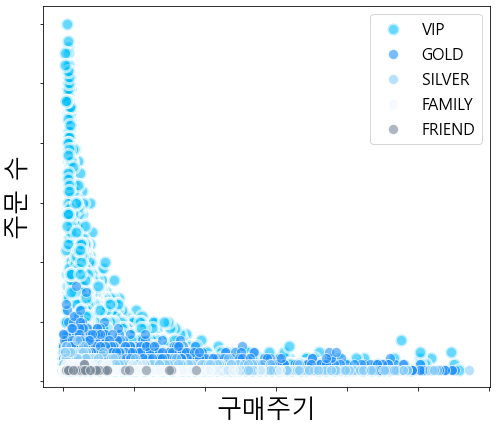

In [96]:
plt.figure(figsize=(8,7))
plt.xlabel('구매주기', fontsize=25)
plt.ylabel('주문 수', fontsize=25)

plt.xticks(np.arange(0, 601, 100), [])
plt.yticks(np.arange(0, 61, 10), [])

plt.scatter(grade_1_평균구매주기, grade_1_구매빈도, color = 'deepskyblue', alpha = 0.6, label = 'VIP', edgecolor='white', s=150, linewidth=3)
plt.scatter(grade_2_평균구매주기, grade_2_구매빈도, color = 'dodgerblue', alpha = 0.6, label = 'GOLD', edgecolor='white', s=100, linewidth=1)
plt.scatter(grade_3_평균구매주기, grade_3_구매빈도, color = 'lightskyblue', alpha = 0.6, label = 'SILVER', edgecolor='white', s=100, linewidth=1)
plt.scatter(grade_4_평균구매주기, grade_4_구매빈도, color = 'aliceblue', alpha = 0.6, label = 'FAMILY', edgecolor='white', s=100, linewidth=1)
plt.scatter(grade_5_평균구매주기, grade_5_구매빈도, color = 'lightslategray', alpha = 0.6, label = 'FRIEND', edgecolor='white', s=100, linewidth=1)
plt.legend(fontsize = 16);

In [86]:
print('1등급 평균 구매주기',df[df.grade=='1등급']['평균구매주기'].mean())
print('1등급 평균 구매횟수', df[df.grade=='1등급']['구매횟수'].mean())


1등급 평균 구매주기 77.27195206268725
1등급 평균 구매횟수 6.795508803342286


In [68]:
print('1등급 외 평균 구매주기',df[df.grade!='1등급']['평균구매주기'].mean())
print('1등급 외 평균 구매횟수', df[df.grade!='1등급']['구매횟수'].mean())


1등급 외 평균 구매주기 96.24760967379078
1등급 외 평균 구매횟수 1.5449285038669114


In [71]:
df_clustering = df.dropna()[['고객번호','평균구매주기','구매횟수','총결제금액','회당 결제금액', '재구매횟수']]
df_clustering.head(2)

,고객번호,평균구매주기,구매횟수,총결제금액,회당 결제금액,재구매횟수
0,201812310749735,290.0,2,54083,27041.5,1
3,201812310749774,80.0,2,116532,58266.0,1


In [72]:
scaler = StandardScaler()
df_clustering.loc[:,'평균구매주기':] = scaler.fit_transform(df_clustering.loc[:,'평균구매주기':])
df_clustering.head(2)

,고객번호,평균구매주기,구매횟수,총결제금액,회당 결제금액,재구매횟수
0,201812310749735,2.655311,-0.63327,-0.418673,0.288562,-0.63327
3,201812310749774,-0.094003,-0.63327,0.043342,2.268139,-0.63327


In [73]:
kmeans = KMeans(n_clusters=5, random_state=1234)
clusters = kmeans.fit(df_clustering.loc[:,'평균구매주기':])
df_clustering['cluster'] = clusters.labels_
df_clustering.head(2)

,고객번호,평균구매주기,구매횟수,총결제금액,회당 결제금액,재구매횟수,cluster
0,201812310749735,2.655311,-0.63327,-0.418673,0.288562,-0.63327,0
3,201812310749774,-0.094003,-0.63327,0.043342,2.268139,-0.63327,4


In [74]:
grade_1_평균구매주기 = df_clustering[df_clustering.cluster == 1]['평균구매주기']
grade_1_구매빈도 = df_clustering[df_clustering.cluster == 1]['구매횟수']

grade_2_평균구매주기 = df_clustering[df_clustering.cluster == 2]['평균구매주기']
grade_2_구매빈도 = df_clustering[df_clustering.cluster == 2]['구매횟수']

grade_3_평균구매주기 = df_clustering[df_clustering.cluster == 3]['평균구매주기']
grade_3_구매빈도 = df_clustering[df_clustering.cluster == 3]['구매횟수']

grade_4_평균구매주기 = df_clustering[df_clustering.cluster == 4]['평균구매주기']
grade_4_구매빈도 = df_clustering[df_clustering.cluster == 4]['구매횟수']

grade_5_평균구매주기 = df_clustering[df_clustering.cluster == 0]['평균구매주기']
grade_5_구매빈도 = df_clustering[df_clustering.cluster == 0]['구매횟수']

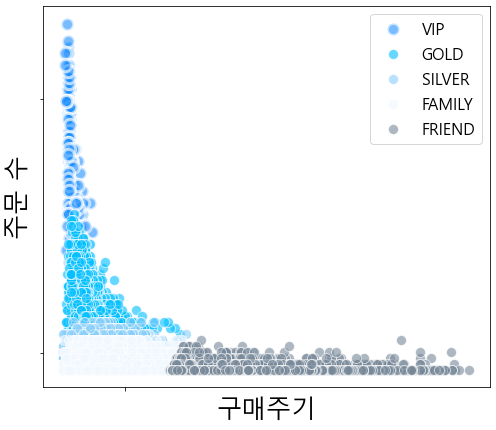

In [85]:
plt.figure(figsize=(8,7))
plt.xlabel('구매주기', fontsize=25)
plt.ylabel('주문 수', fontsize=25)

plt.xticks(np.arange(0, 601, 100), [])
plt.yticks(np.arange(0, 61, 10), [])

plt.scatter(grade_2_평균구매주기, grade_2_구매빈도, color = 'dodgerblue', alpha = 0.6, label = 'VIP', edgecolor='white', s=150, linewidth=3)
plt.scatter(grade_1_평균구매주기, grade_1_구매빈도, color = 'deepskyblue', alpha = 0.6, label = 'GOLD', edgecolor='white', s=100, linewidth=1)
plt.scatter(grade_3_평균구매주기, grade_3_구매빈도, color = 'lightskyblue', alpha = 0.6, label = 'SILVER', edgecolor='white', s=100, linewidth=1)
plt.scatter(grade_4_평균구매주기, grade_4_구매빈도, color = 'aliceblue', alpha = 0.6, label = 'FAMILY', edgecolor='white', s=100, linewidth=1)
plt.scatter(grade_5_평균구매주기, grade_5_구매빈도, color = 'lightslategray', alpha = 0.6, label = 'FRIEND', edgecolor='white', s=100, linewidth=1)
plt.legend(fontsize = 16);

In [76]:
# grade_1_평균구매주기 = df_clustering[df_clustering.cluster == '1등급']['평균구매주기']
# grade_1_구매빈도 = df_clustering[df_clustering.cluster == '1등급']['구매횟수']

# grade_2_평균구매주기 = df_clustering[df_clustering.cluster == '2등급']['평균구매주기']
# grade_2_구매빈도 = df_clustering[df_clustering.cluster == '2등급']['구매횟수']

# grade_3_평균구매주기 = df_clustering[df_clustering.cluster == '3등급']['평균구매주기']
# grade_3_구매빈도 = df_clustering[df_clustering.cluster == '3등급']['구매횟수']

# grade_4_평균구매주기 = df_clustering[df_clustering.cluster == '4등급']['평균구매주기']
# grade_4_구매빈도 = df_clustering[df_clustering.cluster == '4등급']['구매횟수']

# grade_5_평균구매주기 = df_clustering[df_clustering.cluster == '5등급']['평균구매주기']
# grade_5_구매빈도 = df_clustering[df_clustering.cluster == '5등급']['구매횟수']


In [77]:
df_cluster = df.dropna()[['고객번호','평균구매주기','구매횟수','총결제금액','회당 결제금액', '재구매횟수']]
mapping = {0:'5등급', 1:'2등급', 2:'1등급', 3:'3등급', 4:'4등급'}
df_cluster['cluster'] = df_clustering['cluster'].map(mapping)
df_cluster

,고객번호,평균구매주기,구매횟수,총결제금액,회당 결제금액,재구매횟수,cluster
0,201812310749735,290.0,2,54083,27041.500000,1,5등급
3,201812310749774,80.0,2,116532,58266.000000,1,4등급
5,201812310749783,108.0,8,236963,29620.375000,7,2등급
6,201812310749784,75.0,8,166877,20859.625000,7,2등급
7,201812310749787,35.0,17,430920,25348.235294,16,2등급
...,...,...,...,...,...,...,...
65512,201910070999851,33.0,5,110426,22085.200000,4,3등급
65517,201910070999882,56.0,4,189424,47356.000000,3,4등급
65521,201910070999896,71.0,4,150471,37617.750000,3,4등급
65523,201910070999905,48.0,2,205606,102803.000000,1,4등급


In [78]:
def by_label(df, label):
    df_per = pd.DataFrame(df.groupby(label)['총결제금액'].agg(['sum']) / df['총결제금액'].sum())
    df_per = df_per.reset_index(drop=False)
    df_per.sort_values('sum', ascending=False, inplace = True)
    df_per = df_per.reset_index(drop=True)
    df_count = pd.DataFrame(df.groupby(label)['고객번호'].agg(['count'])).reset_index(drop=False)
    df_per = pd.merge(df_per, df_count, on=label, how='left')
    df_per.rename({'sum':'구입액퍼센트', 'count': '고객수(명)'}, axis=1, inplace=True)
    df_per['고객수퍼센트'] = df_per['고객수(명)'] / df_per['고객수(명)'].sum()
    df_per = df_per[[label,'고객수(명)','고객수퍼센트','구입액퍼센트']]
    return df_per

In [79]:
by_label(df_cluster, 'cluster')

,cluster,고객수(명),고객수퍼센트,구입액퍼센트
0,4등급,6786,0.249110,0.353238
1,2등급,3388,0.124371,0.332909
2,3등급,13396,0.491759,0.211900
3,1등급,206,0.007562,0.061595
4,5등급,3465,0.127198,0.040358


In [81]:
df = pd.merge(df, df_cluster[['고객번호','cluster']], on='고객번호', how='left')

In [82]:
print('1등급 평균 구매주기',df[df.cluster=='1등급']['평균구매주기'].mean())
print('1등급 평균 구매횟수', df[df.cluster=='1등급']['구매횟수'].mean())


1등급 평균 구매주기 14.271844660194175
1등급 평균 구매횟수 34.55825242718446


In [83]:
print('1등급 외 평균 구매주기',df[df.cluster!='1등급']['평균구매주기'].mean())
print('1등급 외 평균 구매횟수', df[df.cluster!='1등급']['구매횟수'].mean())


1등급 외 평균 구매주기 87.73571296467541
1등급 외 평균 구매횟수 2.4922001877318714
